In [21]:
# Importing and basic utility cell
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
%matplotlib inline
!pip install datascience 
from datascience import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
raw_Education = pd.read_excel('Education.xls',header = 4)
raw_PopulationEstimates = pd.read_excel('PopulationEstimates.xls',header = 2)
raw_PovertyEstimates = pd.read_excel('PovertyEstimates.xls',header = 3)
raw_Unemployment = pd.read_excel('Unemployment.xls',header = 9)

education_raw = Table.from_df(raw_Education)
population_estimate_raw = Table.from_df(raw_PopulationEstimates)
poverty_estimates_raw = Table.from_df(raw_PovertyEstimates)
unemployment_raw = Table.from_df(raw_Unemployment)

In [16]:
#filtered_by_state = raw_PopulationEstimates[raw_PopulationEstimates['Area_Name'].isin(states.values())]
filtered_population_estimates = raw_PopulationEstimates[['State',
                   'Area_Name',
                   'Economic_typology_2015',
                   'POP_ESTIMATE_2010',
                   'R_INTERNATIONAL_MIG_2011',
                   'R_INTERNATIONAL_MIG_2012',
                   'R_INTERNATIONAL_MIG_2013',
                   'R_INTERNATIONAL_MIG_2014',
                   'R_INTERNATIONAL_MIG_2015',
                   'R_INTERNATIONAL_MIG_2016']]          

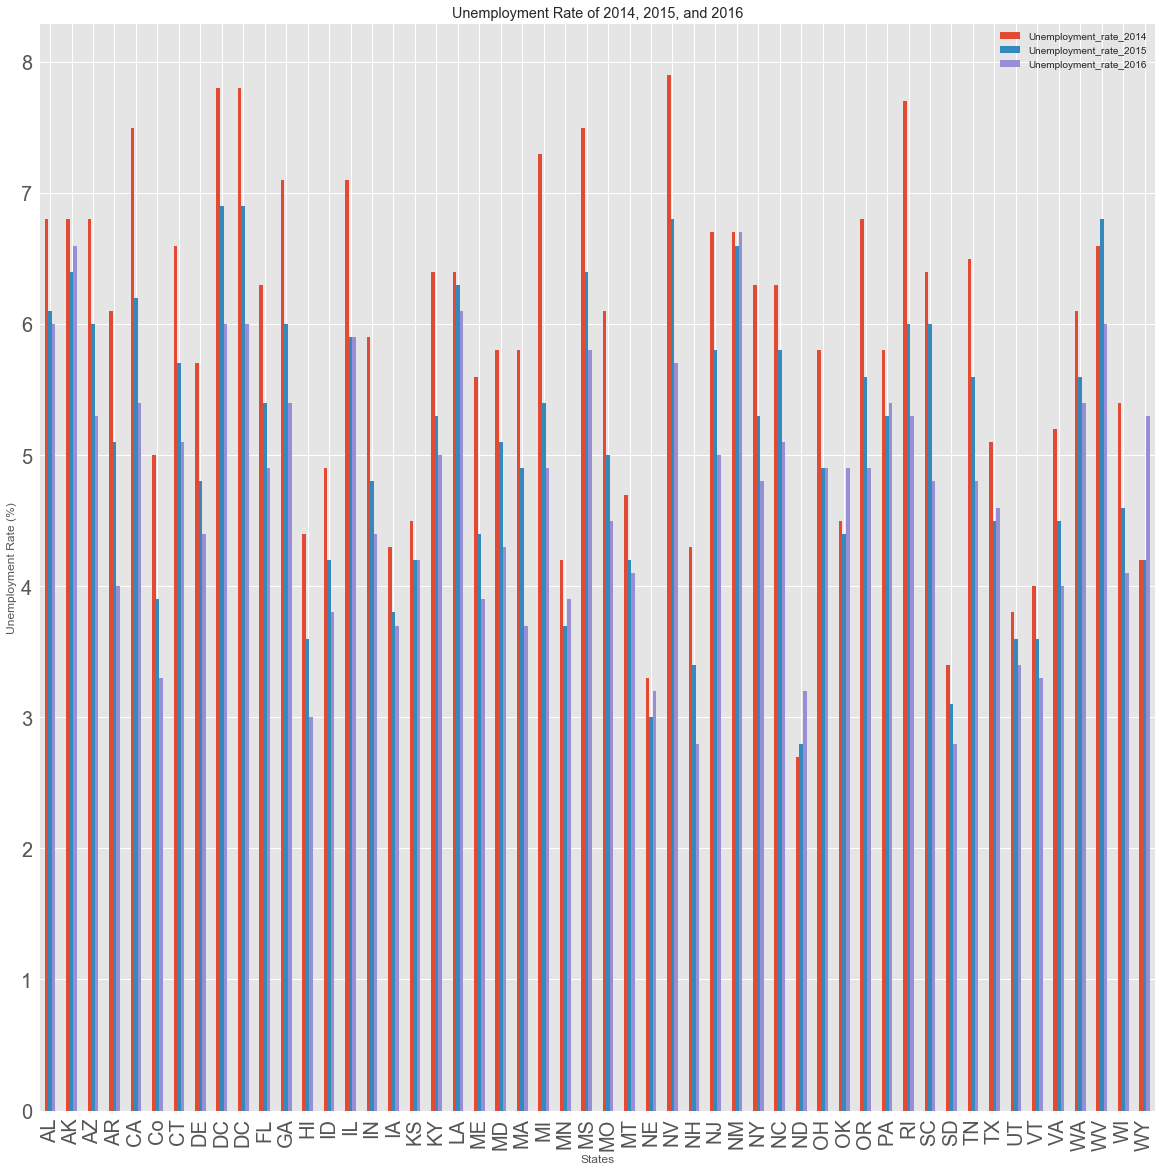

In [17]:
# Plotting unemployment rate for year 2014, 2015, 2016
filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())].drop(['Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013'],axis = 1)
unemployment_rate_2014_2015_2016 = filtered_unemployment[['State',
                                                      'Unemployment_rate_2014',
                                                      'Unemployment_rate_2015',
                                                      'Unemployment_rate_2016']]
unemployment_rate_2014_2015_2016_plot = unemployment_rate_2014_2015_2016.plot.bar(figsize = (20,20),
                                               x = unemployment_rate_2014_2015_2016['State'],
                                               title = 'Unemployment Rate of 2014, 2015, and 2016',
                                               fontsize = 20)

unemployment_rate_2014_2015_2016_plot.set_ylabel('Unemployment Rate (%)')
unemployment_rate_2014_2015_2016_plot.set_xlabel('States')


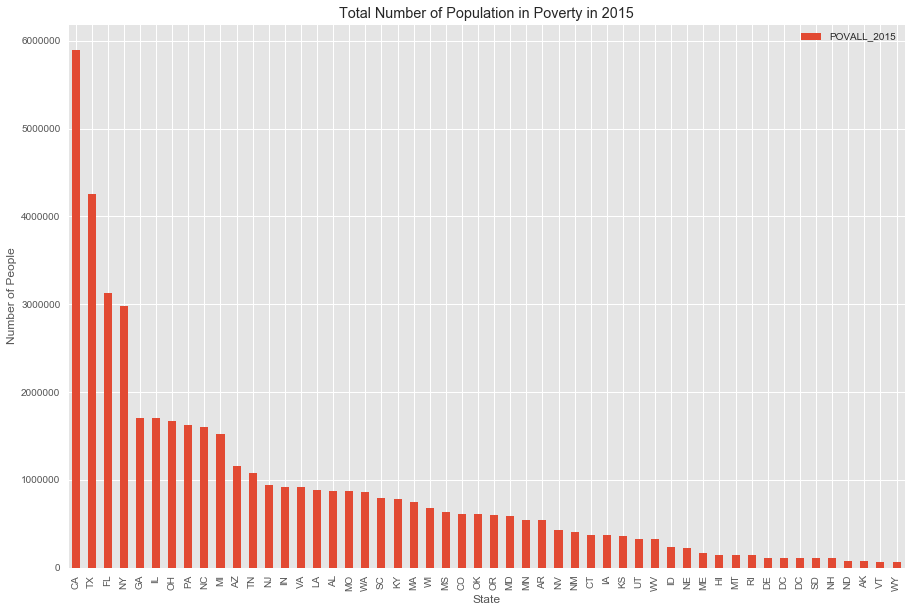

In [18]:
filtered_poverty_estimate = raw_PovertyEstimates[raw_PovertyEstimates['Area_Name'].isin(states.values())]
cleaned_sort_by_states = filtered_poverty_estimate.drop(sort_by_states.columns[[0,3,4,5,6,]],axis = 1)
selected = cleaned_sort_by_states[['State','POVALL_2015','CI90LBAll_2015','CI90UBALL_2015']].sort_values(by = "POVALL_2015",ascending = False)
pov_in_2015 = selected[['State','POVALL_2015']].plot(x = "State", kind = 'bar',figsize=(15,10),title = 'Total Number of Population in Poverty in 2015')
pov_in_2015.set_ylabel('Number of People')